In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/311_Explorer_02.csv', parse_dates=\
                 ['Date Created','Date Closed'],\
                 low_memory = False)
df2 = pd.read_csv('data/weather_categorized.csv', parse_dates=\
                 ['date'],\
                 low_memory = False)
df3 = pd.read_csv('data/council_cleaned.csv', parse_dates=\
                 ['MEETING_DATE'],\
                 low_memory = False)

In [2]:
df3 = df3.drop_duplicates()

In [3]:
df8 = pd.DataFrame({'MEETING_DATE':df3['MEETING_DATE'].unique()})
dates = df3['MEETING_DATE'].unique()
for x in dates:
    council = False
    hearing = False
    committee = False
    v = df3.loc[df3['MEETING_DATE'] == x]['MEETING_TYPE'].values
    
    if 'Council' in v:
        council = True
    if 'Hearing' in v:
        hearing = True
    if 'Committee' in v:
        committee = True
        
    if council and hearing and committee:
        df8.loc[df8['MEETING_DATE'] == x, 'MEETING_TYPE'] = 'Council/Hearing/Committee'
    elif hearing and committee:
        df8.loc[df8['MEETING_DATE'] == x, 'MEETING_TYPE'] = 'Hearing/Committee'    
    elif council and hearing:
        df8.loc[df8['MEETING_DATE'] == x, 'MEETING_TYPE'] = 'Council/Hearing'
    elif council and committee:
        df8.loc[df8['MEETING_DATE'] == x, 'MEETING_TYPE'] = 'Council/Committee'
    elif council:
        df8.loc[df8['MEETING_DATE'] == x, 'MEETING_TYPE'] = 'Council'
    elif hearing:
        df8.loc[df8['MEETING_DATE'] == x, 'MEETING_TYPE'] = 'Hearing'
    elif committee:
        df8.loc[df8['MEETING_DATE'] == x,'MEETING_TYPE'] = 'Committee'   
df3 = df8

In [4]:
# add holidays to 311 data
from datetime import date

import holidays

df['Holidays Closed'] = np.nan

for x in holidays.CA(prov='AB',years=[2013,2014,2015,2016,2017]):
    df.loc[df['Date Closed'] == x, 'Holidays Closed'] = True
    
df['Holidays Closed'].value_counts()

True    1688
Name: Holidays Closed, dtype: int64

In [5]:
# merge weather and 311
df2 = df2.add_suffix(' Closed')
df4 = pd.merge(df,df2,how='left',left_on='Date Closed',right_on='date Closed')
#df5 = pd.merge(df4,df2,how='left',left_on='Date Closed',right_on='date',suffixes=('_created','_closed'))

In [6]:
# merge with council data
df3 = df3.add_suffix(' Closed')
df7 = pd.merge(df4,df3,how='left',left_on='Date Closed',right_on='MEETING_DATE Closed')
#df7 = pd.merge(df6,df3,how='left',left_on='Date Closed',right_on='MEETING_DATE',suffixes=('_created','_closed'))

In [7]:
df7.columns

Index(['Reference Number', 'Date Created', 'Date Closed', 'Request Status',
       'Status Detail', 'Service Category', 'Service Code', 'Business Unit',
       'Neighbourhood', 'Community League', 'Ward', 'Address', 'Lat', 'Long',
       'Location', 'Ticket Source', 'Calendar Year', 'Days to Resolution',
       'Month Created', 'Month Closed', 'Day of Week Request Created',
       'Day of Week Request Closed', 'Holidays Closed', 'date Closed',
       'avg_hourly_temperature Closed', 'min_windchill Closed',
       'avg_dew_point Closed', 'max_wind_gust Closed',
       'wind_gust_dir_10s Closed', 'avg_health_index Closed',
       'precipitation Closed', 'sunlight Closed', 'MEETING_DATE Closed',
       'MEETING_TYPE Closed'],
      dtype='object')

In [8]:
del df7['Date Created']
del df7['Request Status']
del df7['Business Unit']
del df7['Community League']
del df7['Calendar Year']
del df7['Day of Week Request Created']
del df7['date Closed']
del df7['MEETING_DATE Closed']

In [9]:
df7.columns

Index(['Reference Number', 'Date Closed', 'Status Detail', 'Service Category',
       'Service Code', 'Neighbourhood', 'Ward', 'Address', 'Lat', 'Long',
       'Location', 'Ticket Source', 'Days to Resolution', 'Month Created',
       'Month Closed', 'Day of Week Request Closed', 'Holidays Closed',
       'avg_hourly_temperature Closed', 'min_windchill Closed',
       'avg_dew_point Closed', 'max_wind_gust Closed',
       'wind_gust_dir_10s Closed', 'avg_health_index Closed',
       'precipitation Closed', 'sunlight Closed', 'MEETING_TYPE Closed'],
      dtype='object')

In [10]:
print(sum(df7['Service Code'].value_counts(dropna=False)))

291516


In [11]:
df7.loc[df7['Service Code'].isnull(), 'Service Code'] = df7.loc[df7['Service Code'].isnull(), 'Service Category']

In [12]:
print(sum(df7['Service Code'].value_counts()))
del df7['Service Category']

291516


In [13]:
df7 = df7.sort_values('Reference Number')
df7 = df7.replace('no', np.NaN)
df7 = df7.replace('below_freezing', np.NaN)
df7

,Reference Number,Date Closed,Status Detail,Service Code,Neighbourhood,Ward,Address,Lat,Long,Location,...,Holidays Closed,avg_hourly_temperature Closed,min_windchill Closed,avg_dew_point Closed,max_wind_gust Closed,wind_gust_dir_10s Closed,avg_health_index Closed,precipitation Closed,sunlight Closed,MEETING_TYPE Closed
284799,133341338,2013-05-16,NaN,Shaw/Telus Box,WESTMOUNT,6.0,"124 STREET NW, 110 AVENUE NW",53.557302,-113.535900,"(53.5573017377275, -113.535899946293)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,15,NaN
0,133345190,2013-01-03,NaN,Dead Animal,ROPER INDUSTRIAL,9.0,"MCINTYRE ROAD NW, 75 STREET NW",53.494909,-113.442684,"(53.4949091725789, -113.442683685775)",...,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
1,133350619,2013-01-03,NaN,Dead Animal,LARKSPUR,9.0,2004 - 38 AVENUE NW,53.477458,-113.372937,"(53.4774575415008, -113.372937215704)",...,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
2,133358214,2013-01-03,NaN,Dead Animal,GROVENOR,9.0,"STONY PLAIN ROAD NW, 146 STREET NW",53.541951,-113.572553,"(53.5419506014602, -113.572553447766)",...,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
3,133362915,2013-01-03,NaN,Dead Animal,KENSINGTON,9.0,"124 STREET NW, 135 AVENUE NW",53.596425,-113.536605,"(53.5964246289633, -113.536605453992)",...,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
274894,133365471,2013-01-03,NaN,Dead Animal,HOLYROOD,8.0,9008 - 75 STREET NW,53.525560,-113.443745,"(53.525560385314, -113.443745092005)",...,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
284800,133562918,2013-04-30,NaN,Dead Animal,HIGHLANDS,7.0,"118 AVENUE NW, 66 STREET NW",53.570359,-113.443007,"(53.5703587926438, -113.44300741219)",...,NaN,NaN,moderate,NaN,strong_winds,NW,NaN,NaN,15,NaN
284801,133720292,2013-01-04,NaN,Dead Animal,MCCAULEY,6.0,"107A AVENUE NW, 95 STREET NW",53.553895,-113.483594,"(53.5538950664834, -113.483593856346)",...,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
284802,133780574,2013-05-15,NaN,Newspaper Box/Sign,OLIVER,6.0,"104 AVENUE NW, 116 STREET [NORTHBOUND SIDE] NW",53.546222,-113.521299,"(53.5462223336037, -113.521298594868)",...,NaN,NaN,NaN,NaN,windy_direction,NW,NaN,yes,15,NaN
276418,133783648,2013-01-05,NaN,Dead Animal,DAVIES INDUSTRIAL EAST,11.0,6145 - 75 STREET NW,53.499701,-113.439164,"(53.4997013498849, -113.439163787116)",...,NaN,NaN,moderate,NaN,NaN,NaN,NaN,NaN,<8,NaN


In [14]:
# remove items with < 0.35% support
# these are items where the minimum item support could be set for CFPGrowth

#for c in df7.columns:
#    d = df7[c].value_counts().to_dict()
#    for k in d:
#        if d[k]/343637 * 100 < 0.05:
#            df7[c] = df7[c].replace(k, np.NaN)
#            print(c,":",k)


In [15]:
for x,y in df7['Neighbourhood'].value_counts(dropna=False).to_dict().items():
    if y < 40:
        print(x,y)


RIVER VALLEY WINDERMERE 8
ANTHONY HENDAY MISTATIM 8
GLENRIDDING HEIGHTS 22
ANTHONY HENDAY CASTLEDOWNS 1
KINGLET GARDENS 11
ANTHONY HENDAY LAKE DISTRICT 25
ASTER 39
NORWESTER INDUSTRIAL 33
ANTHONY HENDAY CLAREVIEW 6
GRAYDON HILL 16
WINDERMERE AREA 30
WHITEMUD CREEK RAVINE TWIN BROOKS 15
RIVER VALLEY CAMERON 16
DESROCHERS AREA 39


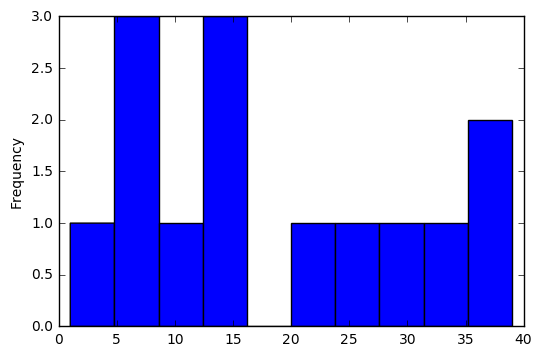

In [16]:
import matplotlib.pyplot as plt 

a = df7['Neighbourhood'].value_counts(dropna=False)
a[a<40].plot.hist()
plt.show()

In [17]:
df7.loc[df7['Neighbourhood']=="ANTHONY HENDAY CASTLEDOWNS"]

,Reference Number,Date Closed,Status Detail,Service Code,Neighbourhood,Ward,Address,Lat,Long,Location,...,Holidays Closed,avg_hourly_temperature Closed,min_windchill Closed,avg_dew_point Closed,max_wind_gust Closed,wind_gust_dir_10s Closed,avg_health_index Closed,precipitation Closed,sunlight Closed,MEETING_TYPE Closed
237516,8015914532,2017-05-30,NaN,Boulevard,ANTHONY HENDAY CASTLEDOWNS,3.0,18040 112 STREET NW,53.643035,-113.528442,"(53.643034946994, -113.528441730397)",...,NaN,NaN,NaN,NaN,strong_winds,SSE,NaN,NaN,16+,Council/Committee


In [18]:
df7.loc[df7['Ward'].isnull(), ['Reference Number','Neighbourhood', 'Long', 'Lat','Location','Ward', 'Address']]

,Reference Number,Neighbourhood,Long,Lat,Location,Ward,Address
124350,138161895,NaN,-113.319828,53.572165,"(53.5721647587943, -113.319828128951)",NaN,"17 STREET NE, YELLOWHEAD TRAIL [WESTBOUND SIDE..."
280555,144439715,NaN,-113.393851,53.541093,"(53.5410929339599, -113.393851164659)",NaN,"34 STREET NW, 101 AVENUE [EASTBOUND SIDE] NW, ..."
284734,144938773,NaN,-113.431093,53.657816,"(53.6578161005905, -113.431092714122)",NaN,"195 AVENUE NW, 66 STREET [SOUTHBOUND SIDE] NW"
285411,144997410,NaN,-113.435104,53.651982,"(53.6519824931068, -113.435103806662)",NaN,"66 STREET [SOUTHBOUND SIDE] NW, ANTHONY HENDAY..."
275590,146016603,NaN,-113.393851,53.541093,"(53.5410929339599, -113.393851164659)",NaN,"34 STREET NW, 101 AVENUE [EASTBOUND SIDE] NW, ..."
81569,151576805,ANTHONY HENDAY ENERGY PARK,-113.435104,53.651982,"(53.6519824931068, -113.435103806662)",NaN,"66 STREET NW, ANTHONY HENDAY DRIVE NW"
285562,153265751,NaN,-113.369257,53.539393,"(53.5393933297421, -113.369257408744)",NaN,"17 STREET, BASELINE ROAD"
285881,153608576,NaN,-113.492369,53.652614,"(53.6526143917998, -113.49236850964)",NaN,"97 STREET [SOUTHBOUND SIDE] NW, ANTHONY HENDAY..."
286312,156410749,NaN,-113.368849,53.715999,"(53.7159985749835, -113.368849209972)",NaN,"18 STREET NW, 259 AVENUE NW"
285641,159208149,NaN,-113.369257,53.539393,"(53.5393933297421, -113.369257408744)",NaN,"17 STREET, BASELINE ROAD"


In [19]:
del df7['Address']
del df7['Lat']
del df7['Long']
del df7['Location']
del df7['Reference Number']

#binarization is done on a server with more memory

In [20]:
df7.columns

Index(['Date Closed', 'Status Detail', 'Service Code', 'Neighbourhood', 'Ward',
       'Ticket Source', 'Days to Resolution', 'Month Created', 'Month Closed',
       'Day of Week Request Closed', 'Holidays Closed',
       'avg_hourly_temperature Closed', 'min_windchill Closed',
       'avg_dew_point Closed', 'max_wind_gust Closed',
       'wind_gust_dir_10s Closed', 'avg_health_index Closed',
       'precipitation Closed', 'sunlight Closed', 'MEETING_TYPE Closed'],
      dtype='object')

In [21]:
# drop low because it is really common
#df7.loc[df7['avg_health_index Created'] == 'low', 'avg_health_index Created'] = np.nan
df7['avg_health_index Closed'].value_counts(dropna=False)

NaN         273985
moderate     16345
high          1186
Name: avg_health_index Closed, dtype: int64

In [22]:
# drop dry because it is really common
#df7.loc[df7['avg_dew_point Created'] == 'dry', 'avg_dew_point Created'] = np.nan
df7['avg_dew_point Closed'].value_counts(dropna=False)

NaN            246059
very humid      32006
comfortable     11330
ok               1856
somewhat          265
Name: avg_dew_point Closed, dtype: int64

In [23]:
del df7['Month Created']

In [24]:
df7['Service Code'].value_counts().to_dict()

{'Abandoned Vehicle': 6273,
 'Alley': 2596,
 'Alley Dust': 133,
 'Alley Flooding': 183,
 'Alley Windrow': 761,
 'Ashtray': 13,
 'Audible Signal Outage': 133,
 'Audible Signal Request': 821,
 'Ball Diamond Repair': 84,
 'Beaver/Muskrat Dam': 82,
 'Bees/Wasps': 575,
 'Bike Lanes': 1,
 'Boulevard': 2243,
 'Bridge': 173,
 'Broken Branches': 6096,
 'Broken Concrete': 35,
 'Broken Glass': 31,
 'Broken Manhole Cover': 3672,
 'Broken Play Structure': 1954,
 'Broken Sports Structure': 75,
 'Bus': 269,
 'Bus Bench Request': 20,
 'Bus Pads or Shelter Request': 72,
 'Bus Phone - Out of Order': 24,
 'Bus Stop': 1117,
 'Canada Post Mail box': 39,
 'City Sidewalks': 2728,
 'Crack': 1425,
 'Cross Walk Painting Request': 618,
 'Curb': 444,
 'Curb Installation': 109,
 'DATS Bus Stuck in Snow': 58,
 'Damaged Bus Stop Sign': 59,
 'Damaged Emergency Sign (i.e. Stop Sign)': 2382,
 'Damaged Non-Emergency Signs (i.e. Speed Limit)': 4105,
 'Dead Animal': 10492,
 'Dead Tree': 2081,
 'Disable Stall': 605,
 'Drai

In [25]:
df7.loc[df7['Service Code'] == "Sidewalks", 'Service Code'] = "Sidewalk"

In [26]:
df7['min_windchill Closed'].value_counts(dropna=False)

NaN          168761
moderate     105936
high          12440
low            3869
very high       510
Name: min_windchill Closed, dtype: int64

In [27]:
df7.columns

Index(['Date Closed', 'Status Detail', 'Service Code', 'Neighbourhood', 'Ward',
       'Ticket Source', 'Days to Resolution', 'Month Closed',
       'Day of Week Request Closed', 'Holidays Closed',
       'avg_hourly_temperature Closed', 'min_windchill Closed',
       'avg_dew_point Closed', 'max_wind_gust Closed',
       'wind_gust_dir_10s Closed', 'avg_health_index Closed',
       'precipitation Closed', 'sunlight Closed', 'MEETING_TYPE Closed'],
      dtype='object')

In [28]:
df7 = df7.loc[df7['Date Closed'].notnull()]
del df7['Date Closed']

In [29]:
del df7['Ward']
df7.to_csv('data/data_merged_closed_month.csv', index=False)

In [30]:
df7

,Status Detail,Service Code,Neighbourhood,Ticket Source,Days to Resolution,Month Closed,Day of Week Request Closed,Holidays Closed,avg_hourly_temperature Closed,min_windchill Closed,avg_dew_point Closed,max_wind_gust Closed,wind_gust_dir_10s Closed,avg_health_index Closed,precipitation Closed,sunlight Closed,MEETING_TYPE Closed
284799,NaN,Shaw/Telus Box,WESTMOUNT,Internet Mail,"(80, inf]",5.0,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,15,NaN
0,NaN,Dead Animal,ROPER INDUSTRIAL,Telephone call,"[0, 2]",1.0,Thursday,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
1,NaN,Dead Animal,LARKSPUR,Telephone call,"[0, 2]",1.0,Thursday,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
2,NaN,Dead Animal,GROVENOR,Telephone call,"[0, 2]",1.0,Thursday,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
3,NaN,Dead Animal,KENSINGTON,Telephone call,"[0, 2]",1.0,Thursday,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
274894,NaN,Dead Animal,HOLYROOD,Telephone call,"[0, 2]",1.0,Thursday,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
284800,NaN,Dead Animal,HIGHLANDS,Telephone call,"(80, inf]",4.0,Tuesday,NaN,NaN,moderate,NaN,strong_winds,NW,NaN,NaN,15,NaN
284801,NaN,Dead Animal,MCCAULEY,Telephone call,"[0, 2]",1.0,Friday,NaN,NaN,moderate,NaN,NaN,NaN,moderate,yes,<8,NaN
284802,NaN,Newspaper Box/Sign,OLIVER,Telephone call,"(80, inf]",5.0,Wednesday,NaN,NaN,NaN,NaN,windy_direction,NW,NaN,yes,15,NaN
276418,NaN,Dead Animal,DAVIES INDUSTRIAL EAST,Telephone call,"[0, 2]",1.0,Saturday,NaN,NaN,moderate,NaN,NaN,NaN,NaN,NaN,<8,NaN


In [31]:
len(df7.loc[df7['Month Closed'].isnull()])

0